## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().sum() # проверяю, есть ли явные пропущенные значения по каждому столбцу: их нет

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

В описании датасета видим, что категориальных переменных нет, также как и пропущенных значений: 
The data contains no missing values and consits of only numeric data, with a three class target variable (Type) for classification.
(https://rdrr.io/cran/rattle.data/man/wine.html)

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
np.random.seed(420) # зафиксировали random seed (тогда параметр random_state внутри функции можно не использовать)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [5]:
len(X_train)/len(X) # здесь я просто чекаю, что размер тренировочной выборки равен примерно 70%

0.6966292134831461

In [6]:
X_train  # здесь я просто чекаю, как выглядит датафрейм тренировочной выборки (видим, что значения перемешались один раз и сид зафиксирован: все ок)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0
157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
from sklearn.preprocessing import StandardScaler  

  # нормирую признаки alcohol и magnesium на тренировочной выборке
scaler = StandardScaler()
normalized_data_train = scaler.fit_transform(X_train[['alcohol','magnesium']]) 

 # нормирую признаки alcohol и magnesium на тестовой выборке
normalized_data_test = scaler.transform(X_test[['alcohol','magnesium']])

 # fit только на тренировочной выборке, transform на обеих выборках - для чистоты результата

Сначала посмотрим как работает классификатор для числа ближайших соседей равного 1. (Для тренировочной выборки)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=1)

clf1 = classifier.fit(normalized_data_train, y_train)
y_predicted = classifier.predict(normalized_data_train)

accuracy_score(y_train, y_predicted)

1.0

Знаем, что accuracy КНН для обучающей выборки при k=1 должна быть равна 1. Это и получили. Все ок, идем дальше :)

In [9]:
# было загуглено, как добавлять по одной строчке в новый датафрейм. источник: https://ru.stackoverflow.com/questions/923400/%D0%9A%D0%B0%D0%BA-%D0%B4%D0%BE%D0%B1%D0%B0%D0%B2%D0%B8%D1%82%D1%8C-%D0%BD%D0%BE%D0%B2%D1%83%D1%8E-%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D1%8C-%D0%B2-dataframe
df = pd.DataFrame(columns=['NN','Train', 'Test'])

for k in [1, 3, 5, 10, 15, 25]:
    
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(normalized_data_train, y_train).predict(normalized_data_train)
    y_predicted_test = KNeighborsClassifier(n_neighbors=k).fit(normalized_data_train, y_train).predict(normalized_data_test)
    
    df.loc[len(df)] = [k, accuracy_score(y_train, y_predicted),accuracy_score(y_test, y_predicted_test)]
    
    print(f"k = {k}; accuracy(train) = {accuracy_score(y_train, y_predicted)}; accuracy(test) = {accuracy_score(y_test, y_predicted_test)}.")

k = 1; accuracy(train) = 1.0; accuracy(test) = 0.7037037037037037.
k = 3; accuracy(train) = 0.8225806451612904; accuracy(test) = 0.7962962962962963.
k = 5; accuracy(train) = 0.7741935483870968; accuracy(test) = 0.7592592592592593.
k = 10; accuracy(train) = 0.75; accuracy(test) = 0.7962962962962963.
k = 15; accuracy(train) = 0.6935483870967742; accuracy(test) = 0.8148148148148148.
k = 25; accuracy(train) = 0.6854838709677419; accuracy(test) = 0.8148148148148148.


Здесь я обучила классификаторы с разными k и представила результаты accuracy для тренировочной и тестовой выборок. Ниже то же самое, только в виде более визуально приятной таблички.

In [10]:
df

,NN,Train,Test
0,1.0,1.000000,0.703704
1,3.0,0.822581,0.796296
2,5.0,0.774194,0.759259
3,10.0,0.750000,0.796296
4,15.0,0.693548,0.814815
5,25.0,0.685484,0.814815


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [11]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [12]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

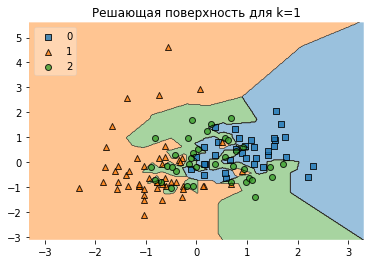

In [13]:
# Сначала просто попробую нарисовать решающую поверхность для k=1 тренировочной выборке, чтобы посмотреть как оно работает 

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets

plot_decision_regions(normalized_data_train, y_train, clf=clf1, legend=2)


plt.title('Решающая поверхность для k=1')
plt.show()

In [14]:
clf1 = KNeighborsClassifier(n_neighbors=1) # записываю классификаторы с разными k, чтобы потом обратиться к ним из списка
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = KNeighborsClassifier(n_neighbors=10)
clf5 = KNeighborsClassifier(n_neighbors=15)
clf6 = KNeighborsClassifier(n_neighbors=25)

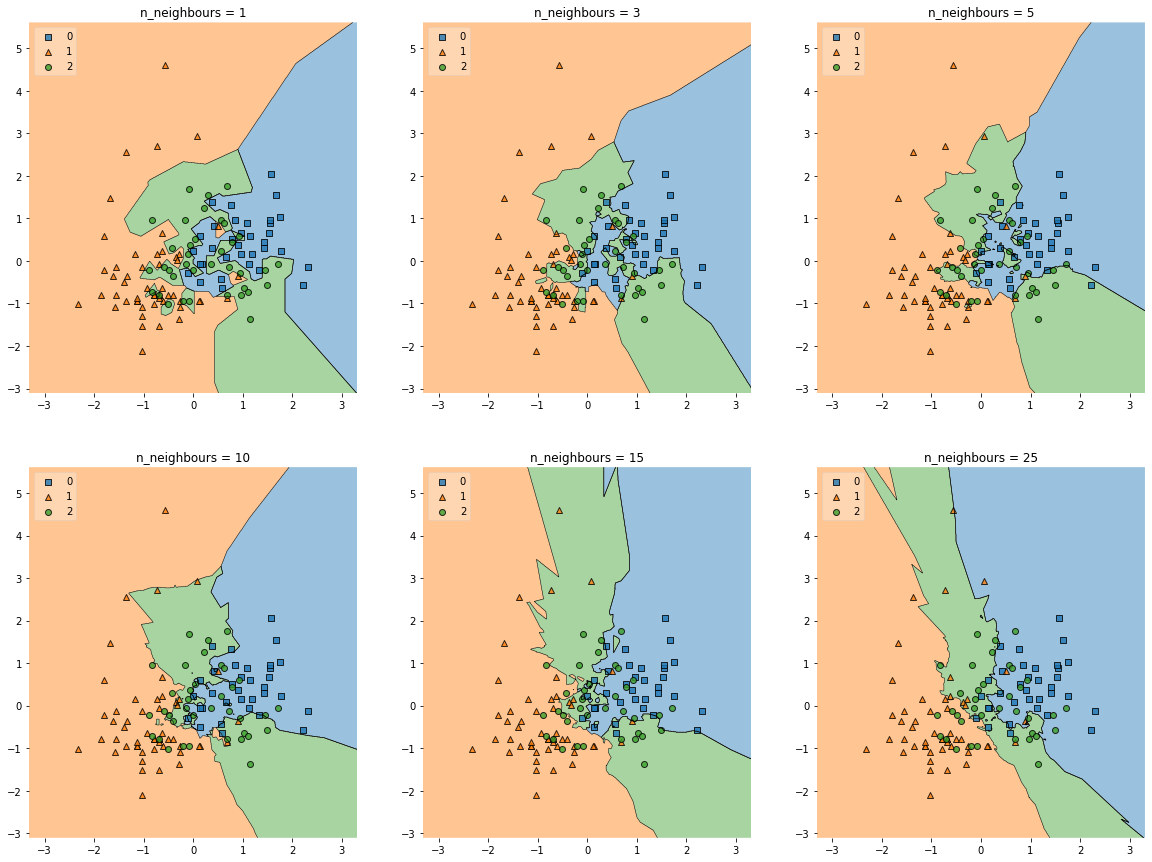

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3) # 2 строки 3 столбца

fig = plt.figure(figsize=(20,15))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1], [0 , 1, 2])):

    clf.fit(normalized_data_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=normalized_data_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

По результатам значений accuracy, полученных в 1.3 можем видеть, что на тренировочной выборке доля правильных ответов уменьшается с увеличением k. Результаты по тестовой выборке во многом зависят от того, какие наблюдения попали в выборку (от random seed), но если бы мы выбирали оптимальное k только по соотношению accuracy на тестовой выборке - выбрали бы k=15 или 25 (т.к там наибольшая доля правильных ответов).
Теперь посмотрим на decision regions. Видим, что для k=1,3,5 модель переобучается. (Можно предположить, что она будет давать высокую accuracy на обучающей выборке и низкую на тестовой, на незнакомых данных). Для k=25, скорее всего, будет недообучение (особенно, если выборка небольшая). Оптимальным будет выбрать k=10 или k=15.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

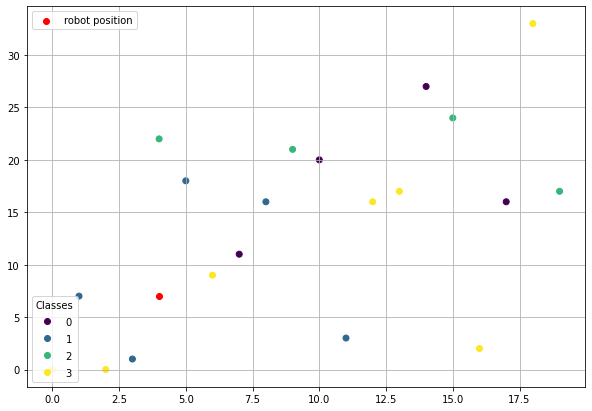

In [16]:
np.random.seed(12345)
x1 = np.arange(20)
landmarks1 = x1 + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x1, landmarks1, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position] # создала пустой список и добавляю туда координаты начальной точки
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes) 
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        
        prob_result = np.random.binomial(1,0.8) # переменная содержит результат "подбрасывания монетки": 0 с вероятностью 0,2 и 1 с вероятностью 0,8
        
        if prob_result == 0: 
            new_place = self.trajectory[-1] + np.array([1, 0]) # берем последнее значение из истории передвижений и двигаемся вправо
            self.trajectory.append(new_place) # сохраняем в историю передвижений нашу движуху
            
        elif prob_result == 1:
            class_n = self.knn.predict([self.trajectory[-1]]) # предсказываем класс по соседям
            new_place = self.trajectory[-1] +self.mapping[class_n[0]] # двигаемся в новую точку, согласно распределению по классам
            self.trajectory.append(new_place) # также, сохраняем

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [19]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory) 
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

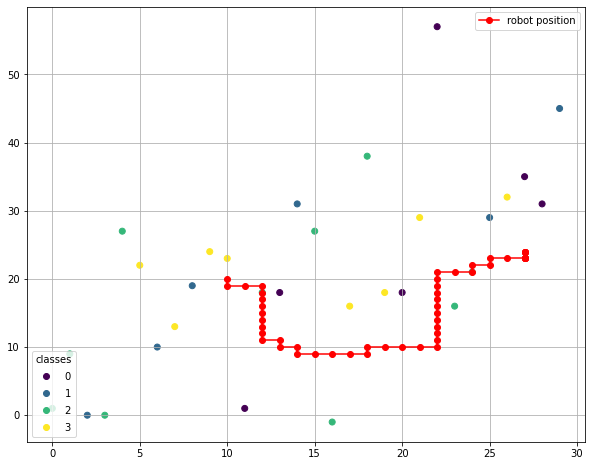

In [20]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50) # ну какава красота :')

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

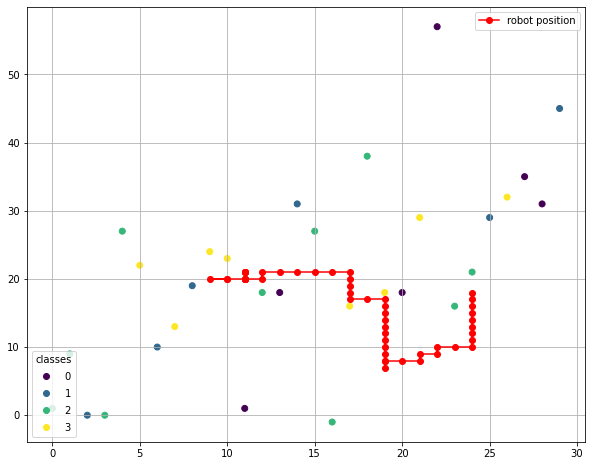

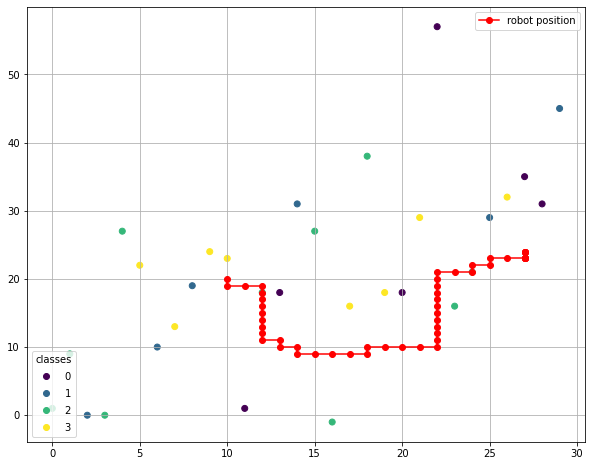

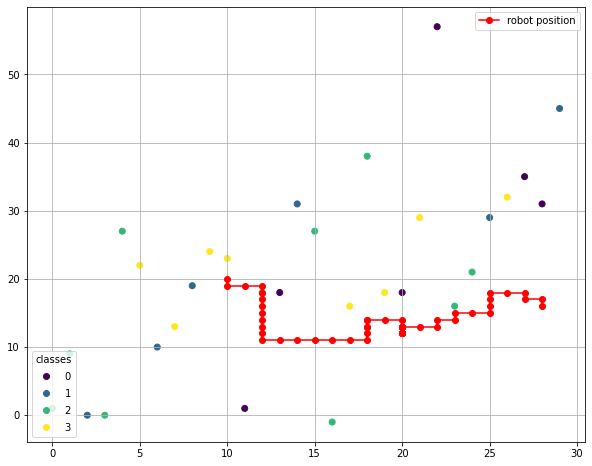

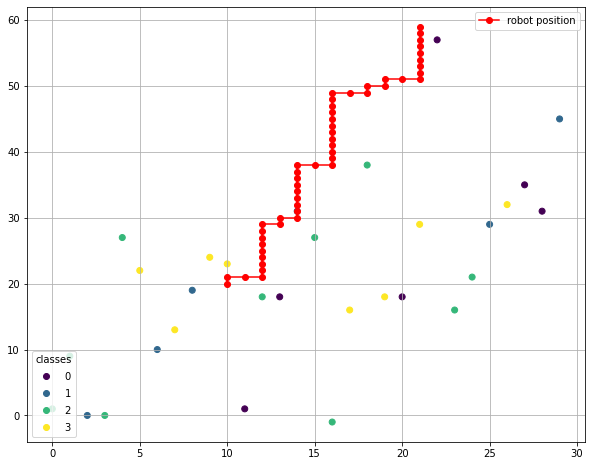

In [21]:
# я решила не прописывать отдельно каждый новый классификатор, а просто перебрать k через цикл

x = np.arange(30)
for k in [1, 5, 10, 30]:
    conduct_experiment(x, mean = 3, std = 10, k=k, n_movements = 50)
    

Похоже, что с увеличением числа соседей, робот начинает вести себя более предсказуемо. Например, это очень хорошо видно на последнем графике при числе соседей = 30 (это объем выборки). В этом случае предсказания по kNN будут давать всегда один результат, неопределенность только в подбрасывании монетки. Разное количество соседей - разное движение робота, т.к. меняются предсказания движения по классам. 
Если бы классы задавались осмысленно, траектория движения тоже бы менялась.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [22]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [23]:
data.isna().sum() # проверяем пропущенные значения в каждом столбце

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропущенных значений нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

Столбец "Unnamed: 0" не несет никакой дополнительной информации, показывает просто номера наблюдений. Для этого у нас уже есть индексы, поэтому удалим этот столбец.

In [24]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head(10) # чекаем, все удалилось

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [25]:
import seaborn as sns

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

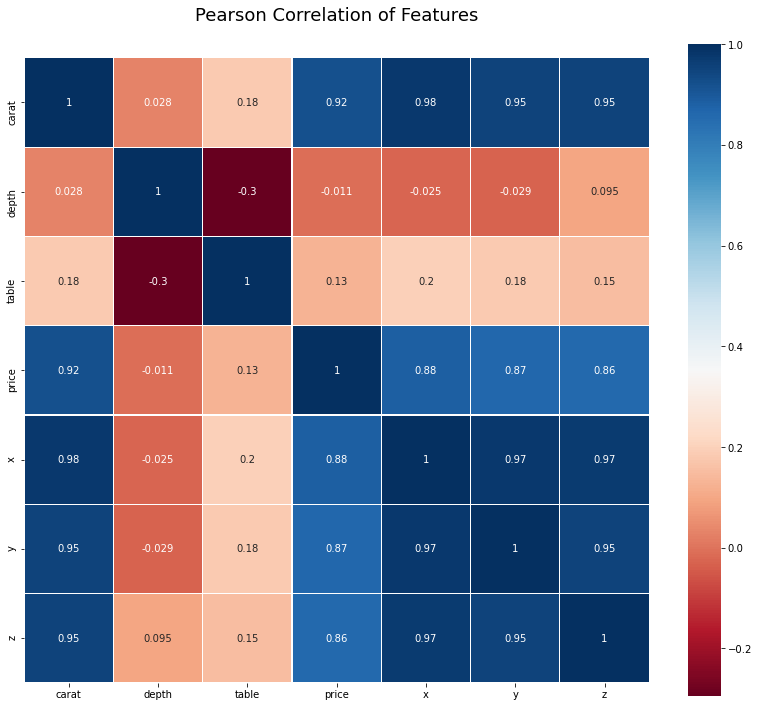

In [26]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Целевая переменная - price. Больше всего с ней коррелируют carat, x, y и z. (Это логично, потому что эти параметры отвечают за размеры алмазиков)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

Категориальные переменные: 'cut', 'color', 'clarity'

In [27]:
dum = pd.get_dummies(data['cut'])
data.drop('cut', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)
data.head(5) # чекаем, что все закодировалось и присоединилось к исходной таблице

,carat,color,clarity,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0


In [28]:
dum = pd.get_dummies(data['color'])
data.drop('color', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)
data.head(5) # чекаем снова

,carat,clarity,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,Very Good,D,E,F,G,H,I,J
0,0.23,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1


In [29]:
dum = pd.get_dummies(data['clarity'])
data.drop('clarity', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)
data.head(5) # чекаем снова

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [30]:
from sklearn.model_selection import train_test_split
X = data.drop('price', 1).values
y = data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
len(X_train)/len(X) # чекаем долю тренировочной выборки: все ок

0.7

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [32]:
from sklearn.preprocessing import StandardScaler  

data_train = X_train.T[0:6] # разделяем датафрейм и берем только вещественные признаки (это первые 6)
data_test = X_test.T[0:6]

scaler = StandardScaler()
normalized_data_train = scaler.fit_transform(data_train.T) # обучаем только на тренировочной 
normalized_data_test = scaler.transform(data_test.T)

In [33]:
X_train = np.concatenate((normalized_data_train, X_train.T[6:].T), axis=1) # соединяем датафрейм воедино! отнормированные столбцы с закодированными категориальными переменными
X_test = np.concatenate((normalized_data_test, X_test.T[6:].T), axis=1)

In [34]:
X_train.shape # здесь я просто чекаю, что получилась таблица по размерам такая же, как и была 

(37758, 26)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [35]:
from sklearn.linear_model import LinearRegression
X = X_train
y = y_train
reg = LinearRegression().fit(X, y)
reg.score(X, y) 

0.9209809182172092

Полученное число - это коэффициент детерминации нашей регрессии. (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

In [36]:
y_pred_train = reg.predict(X_train) # делаем предикшены, чтобы посчитать MSE
y_pred_test = reg.predict(X_test)

In [37]:
 # https://stackoverflow.com/questions/16774849/mean-squared-error-in-numpy
 # можно определить функцию MSE   

def MSE(y: np.array, y_pred: np.array):
    return np.square(y - y_pred).mean()

print(MSE(y_train, y_pred_train), 'среднеквадратичная ошибка на тренировочной выборке')
print(MSE(y_test, y_pred_test), 'среднеквадратичная ошибка на тестовой выборке')

1267634.675322585 среднеквадратичная ошибка на тренировочной выборке
1300722.3768764224 среднеквадратичная ошибка на тестовой выборке


In [38]:
# а можно воспользоваться готовой метрикой (мне так больше нравится)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_pred_train), 'среднеквадратичная ошибка на тренировочной выборке')
print(mean_squared_error(y_test, y_pred_test), 'среднеквадратичная ошибка на тестовой выборке')

1267634.675322585 среднеквадратичная ошибка на тренировочной выборке
1300722.3768764224 среднеквадратичная ошибка на тестовой выборке


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [39]:
reg.coef_

array([ 5.41343327e+03, -9.73026233e+01, -6.44597485e+01, -1.23894510e+03,
        4.45210118e+01, -2.55893991e+01, -5.70620173e+02, -2.40690093e+00,
        2.52688987e+02,  1.78051799e+02,  1.42286288e+02,  8.32351299e+02,
        6.32377770e+02,  5.53022785e+02,  3.40183314e+02, -1.44283393e+02,
       -6.49321389e+02, -1.56433038e+03, -3.74817545e+03,  1.53567477e+03,
       -1.65015990e+02, -1.14687167e+03,  7.52744411e+02,  4.38206024e+02,
        1.19350831e+03,  1.13992960e+03])

Вещественные переменные с непропорционально большими оценками коэффициентов:
carat, x. (То есть из массива выше индесы 0 и 3)

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [40]:
from sklearn import linear_model 
clf = linear_model.Lasso(alpha=10)  
clf.fit(X_train, y_train)
print(clf.coef_)

[ 4935.01959991  -107.88010488   -83.03854357  -788.30498712
    -0.           -25.66046636  -430.64493392   -27.84845623
    91.48253742     0.             0.           343.25316651
   186.64202711   118.80679649     0.          -424.84191908
  -861.18861104 -1667.85710559 -3489.95848418   705.52308747
  -633.56872577 -1555.43453541   157.20628254   -22.17041486
   526.56755497   527.83198952]


Оценки коэффициентов в Lasso-регресии ^

In [41]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=10)
clf.fit(X_train, y_train)
print(clf.coef_)

[ 5.37315214e+03 -9.57843542e+01 -6.47688516e+01 -1.18616575e+03
  3.22807354e+01 -2.94955109e+01 -5.74345625e+02 -1.84045538e+00
  2.53985778e+02  1.78019412e+02  1.44180891e+02  8.27395445e+02
  6.28826222e+02  5.49521523e+02  3.38419781e+02 -1.44790731e+02
 -6.46044579e+02 -1.55332766e+03 -3.67641692e+03  1.51632907e+03
 -1.73070180e+02 -1.15048112e+03  7.42890559e+02  4.29766885e+02
  1.18163816e+03  1.12934355e+03]


Оценки коэффициентов в Ridge-регресии ^.
Сильно ли уменьшились веса? Не особо. В Lasso уменьшились сильнее, особенно коэффициент при переменной 'x'(один из параметров размера алмазика). Также в Lasso занулился коэффициент при 'y'. В Ridge-регрессии совсем немного уменьшились коэффициенты, по сравнению с начальной моделью. Проблема мультиколлинеарности не так сильно проявлялась в изначальной регрессии (?)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [42]:
y1 = [] # эти пустые списочки для того, чтобы построить потом графики, а сейчас из цикла записывать туда данные (нормы весов)
y2 = []
for alfa in [0.1, 1, 10, 100, 200]:  # в цикле перебираем разные альфы
    Lasso_clf = linear_model.Lasso(alpha=alfa) 
    Lasso_clf.fit(X_train, y_train) # обучаем
    Lasso_norm = np.linalg.norm(Lasso_clf.coef_) # считаем норму
    y1.append(Lasso_norm) # добавляем в список 
    print('Lasso regression,', 'alpha =',alfa,',', 'norm =',Lasso_norm)
    
    Ridge_clf = Ridge(alpha=alfa)
    Ridge_clf.fit(X_train, y_train)
    Ridge_norm = np.linalg.norm(Ridge_clf.coef_)
    y2.append(Ridge_norm)
    print('Ridge regression,', 'alpha =',alfa,',', 'norm =',Ridge_norm)

C:\miniconsa\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73945515.02342224, tolerance: 60571888.44891648
  model = cd_fast.enet_coordinate_descent(


Lasso regression, alpha = 0.1 , norm = 7695.070339307183
Ridge regression, alpha = 0.1 , norm = 7544.59709946289
Lasso regression, alpha = 1 , norm = 7645.741882382575
Ridge regression, alpha = 1 , norm = 7536.848609404636
Lasso regression, alpha = 10 , norm = 6718.611165041601
Ridge regression, alpha = 10 , norm = 7460.877833711401
Lasso regression, alpha = 100 , norm = 3699.54160703164
Ridge regression, alpha = 100 , norm = 6822.719474518895
Lasso regression, alpha = 200 , norm = 3492.2629155453674
Ridge regression, alpha = 200 , norm = 6290.739895647425


Рисуем!

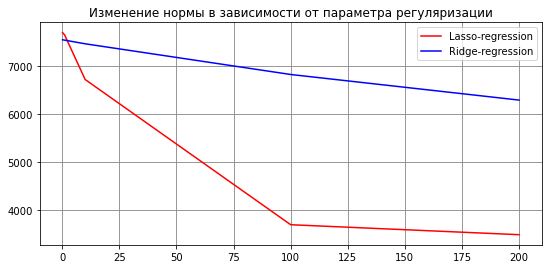

In [43]:
import math
import matplotlib.ticker as ticker

x = [0.1, 1, 10, 100, 200]

fig = plt.figure(figsize=(9,9))

ax = fig.add_subplot(2, 1, 1)

ax.plot(x, y1, label='Lasso-regression', color='red')  
ax.plot(x, y2, label='Ridge-regression', color='blue')

ax.set(title = 'Изменение нормы в зависимости от параметра регуляризации')
ax.grid(which='major',
        color = 'grey') 

ax.legend()

plt.show()  

По значениям норм для разных альфа, а также по графику видим, что Lasso более агрессивно уменьшает веса. Lasso-регрессию часто используют для отбора признаков, потому что она "штрафует" за большие коэффициенты и зануляет некоторые коэффициенты.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [44]:
np.random.seed(12345)

from sklearn.linear_model import LassoCV
reg = LassoCV(alphas = [0.1, 1, 10, 100, 200], cv=5).fit(X_train, y_train)
reg.mse_path_  # получаем матрицу 5х5

C:\miniconsa\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788111741.2385788, tolerance: 49040524.2383942
  model = cd_fast.enet_coordinate_descent_gram(


array([[2499488.40528845, 2408855.67234469, 2516721.96167641,
        2368422.20910841, 2456671.75630439],
       [2270053.07680592, 2200710.5078026 , 2292044.91844126,
        2144966.34457202, 2230098.2991904 ],
       [1325497.59771636, 1302775.39057335, 1342747.27780316,
        1240685.28901284, 1327499.4717597 ],
       [1283626.7751007 , 1268811.50521186, 1298461.33094771,
        1211552.42778911, 1293978.94192545],
       [1283242.98284457, 1268607.2742923 , 1297218.95003188,
        1216442.19587651, 1293802.7365033 ]])

In [45]:
reg.alphas_ # смотрим в каком порядке идут альфы

array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

In [46]:
mean_errors = np.mean(reg.mse_path_, axis = 1) # ищем средние значения по строкам матрицы ошибок

In [47]:
optimal_alpha = reg.alphas_[mean_errors.argmin()] # выбираем минимальную ошибку из средних значений и находим соответсвующее значения альфы
optimal_alpha

1.0

Получили наибольшее качество (наименьшую ошибку при параметре альфа=1)

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [48]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=optimal_alpha)
clf.fit(X_train, y_train)
print(clf.coef_)

[ 5366.78023015   -98.92769322   -66.34534191 -1156.74516414
    -0.           -23.88167902  -688.80031405  -134.98567319
   106.34566873    27.04882178     0.           477.86154929
   282.20383463   203.93492688     0.          -478.23018263
  -976.36455783 -1880.50014746 -4206.24426309   969.90383344
  -694.92575546 -1670.85741453   210.4070624    -90.86894503
   643.76914602   595.65292141]


Из вещественных переменных: неинформативным оказался признак 'y' - ширина алмазика. Возможно, это связано с тем, что у нас есть признаки 'carat' и 'x', которые отвечают за вес и длину алмаза и дают информацию для оценки стоимости алмаза. У них, кстати, высокие коэффициенты (по модулю) - значит они наиболее информативны. Связь карат и цены алмаза прямая и очень сильная - это интуитивно понятно: тяжелые алмазики стоят дорого.
Также, есть категориальные значения (закодированные), которые занулились или изменили свое значение по модулю. Возможно, это связанно с тем, что среди категориальных признаков после кодировки очень много линейно зависимых. 

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [49]:
y_pred_test = clf.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_test)
mse_lasso

1299531.2372090768

Мы помним что среднеквадратичная ошибка на тестовой выборке обычной линейной регрессии была равна 1300722.3768764224. Она больше, чем то, что мы получили с использованием Lasso-регрессии (круто!). 

In [50]:
mse_0 = 1300722.3768764224
(1-mse_lasso/mse_0)*100

0.09157524222855873

Получили что новое значение MSE(Lasso) на 0.0916 % меньше чем значение MSE для обычной регрессии. Вероятно, это говорит о том, что Lasso помогла регуляризовать коэффициенты и решила проблему мультиколлинеарности. (Хотя, я подозреваю, что при других значениях рандома, мы могли получить другие результаты. Также, на качество модели могут сильно влиять выбросы, которые я нигде не убирала, поэтому не уверена, как будет вести себя модель при их удалении). 